In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

# Charger Iris
data = load_iris()
X = data.data      # features shape (150, 4)
y = data.target    # labels shape (150,)

# Normalisation (optionnelle mais conseillée pour les MLP)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convertir en tenseurs PyTorch
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)
y=torch.eye(len(y.unique()))[y]
print(y.shape)

torch.Size([150, 3])


In [2]:
from  core import model,layres,losses,metrics,optimizers
from utils import initializers
import torch


In [3]:
MLp_model=model.Deep_learning_Model(
    "adam","Crossentropy"
)

In [4]:
########## Adding Layers to the model  ##############
# layer with xavier intilaztion 


layer=layres.Layer(X.shape[1],64,"Xaviernormal","lakyrelu")
# add the layer
MLp_model.layers.append(
    layer
)
#  add the layer weights to the model weights
MLp_model.weights.append(
    layer.w
)

layer=layres.Layer(64,5,"Xaviernormal","lakyrelu")
# add the layer
MLp_model.layers.append(
    layer
)
#  add the layer weights to the model weights
MLp_model.weights.append(
    layer.w
)


layer=layres.Layer(5,3,None)
# add the layer
MLp_model.layers.append(
    layer
)
#  add the layer weights to the model weights
MLp_model.weights.append(
    layer.w
)



In [5]:
from utils.data_manipulation import split_data
x_train,y_train,x_test,y_test=split_data(X,y,0.7)
print(f" xtrain_shape :{x_train.shape} , x_test_shape:{x_test.shape} ytrain_shape:{y_train.shape} ytest_shape:{y_test.shape}")




 xtrain_shape :torch.Size([105, 4]) , x_test_shape:torch.Size([45, 4]) ytrain_shape:torch.Size([105, 3]) ytest_shape:torch.Size([45, 3])


In [6]:
train_losses,val_losses,accs,val_accs=MLp_model.minibatch_SGD_train(100,x_train,y_train,x_test,y_test,batch_size=32,learning_rate=0.001,accuracy=True)


torch.Size([32, 3])
torch.Size([45, 3])
tensor(31.1111)
1 : train_loss: 0.4922814667224884  | val_loss:0.428678959608078
1 : train accracy : 28.125  | val accuracy:31.111112594604492
torch.Size([32, 3])
torch.Size([45, 3])
tensor(33.3333)
2 : train_loss: 0.4102395474910736  | val_loss:0.3960976302623749
2 : train accracy : 37.5  | val accuracy:33.333335876464844
torch.Size([32, 3])
torch.Size([45, 3])
tensor(46.6667)
3 : train_loss: 0.3821878135204315  | val_loss:0.3684374988079071
3 : train accracy : 37.5  | val accuracy:46.66666793823242
torch.Size([32, 3])
torch.Size([45, 3])
tensor(48.8889)
4 : train_loss: 0.3764316141605377  | val_loss:0.34770992398262024
4 : train accracy : 37.5  | val accuracy:48.88888931274414
torch.Size([32, 3])
torch.Size([45, 3])
tensor(53.3333)
5 : train_loss: 0.3663807809352875  | val_loss:0.33044999837875366
5 : train accracy : 46.875  | val accuracy:53.333335876464844
torch.Size([32, 3])
torch.Size([45, 3])
tensor(57.7778)
6 : train_loss: 0.3304797410964

In [7]:
len(val_accs)

100

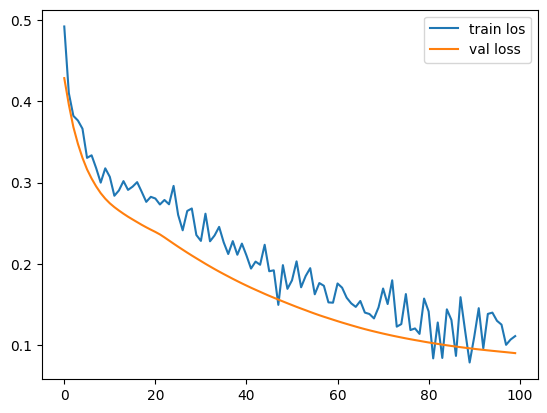

In [8]:
import matplotlib.pyplot as plt
plt.plot(range(100),train_losses,label="train los")
plt.plot(range(100),val_losses,label="val loss")
plt.legend()

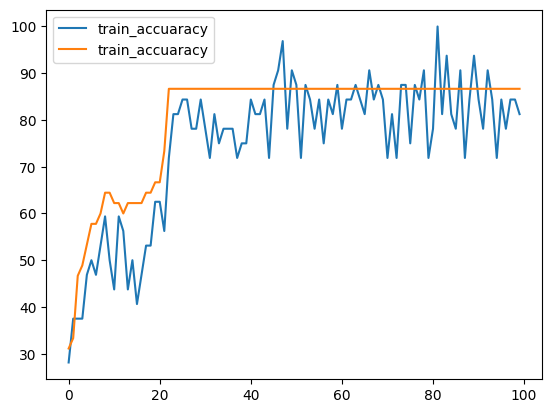

In [9]:
plt.plot(range(100),accs,label="train_accuaracy")
plt.plot(range(100),val_accs,label="train_accuaracy")
plt.legend()